Student name: Aryank Gupta

Student ID: 24101613

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

In [3]:
X.shape

(70000, 784)

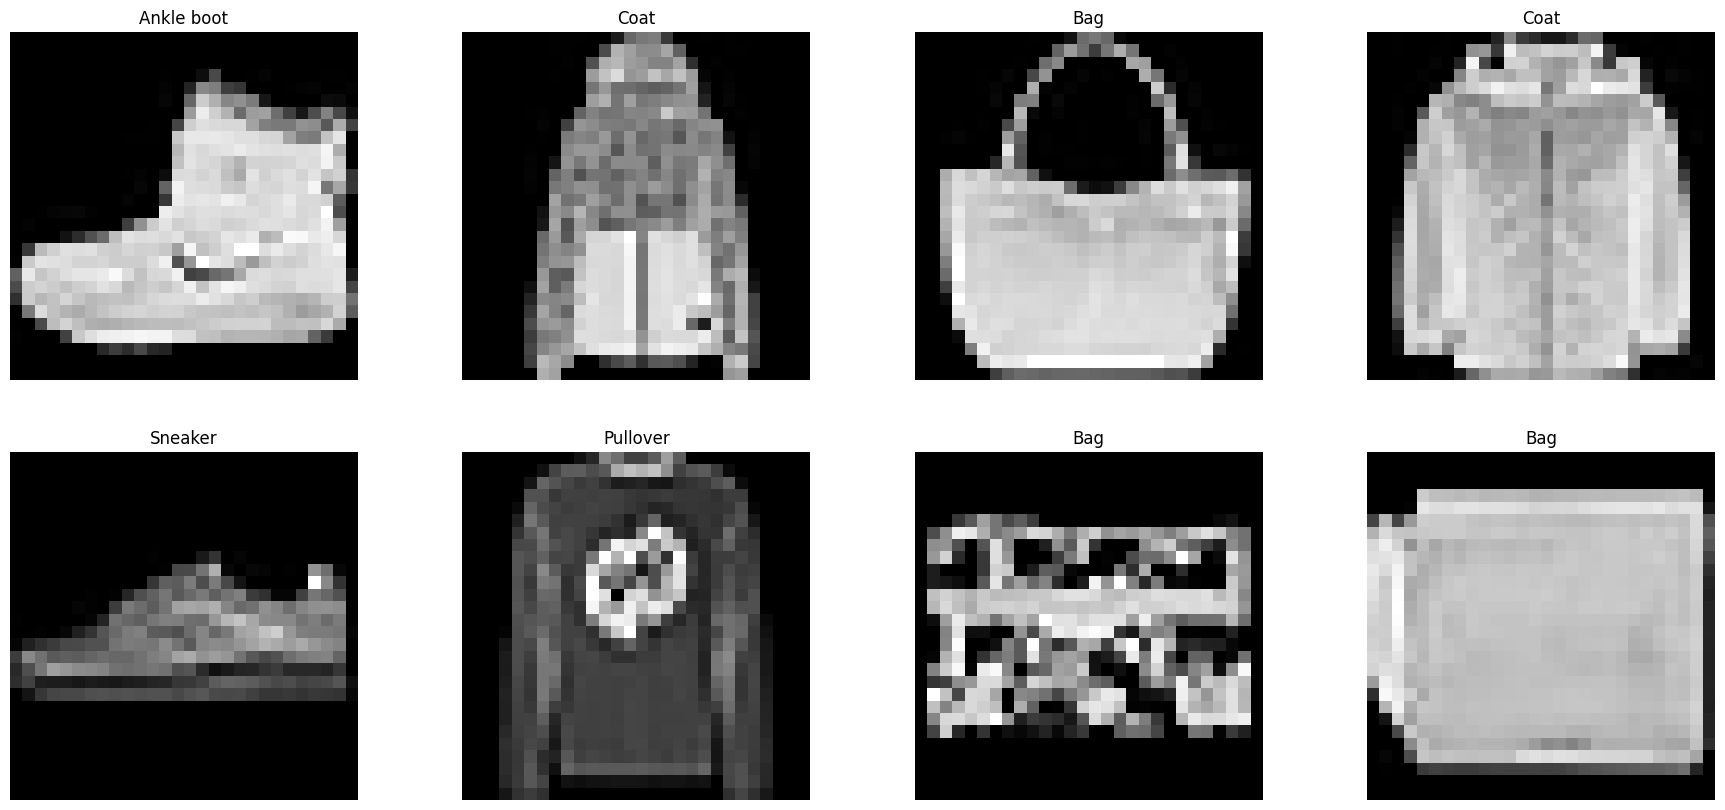

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################
# Your code here
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)


## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [6]:
from sklearn.linear_model import Perceptron as Perceptron

##################
# Your code here
model = Perceptron()
model.fit(X_train,y_train)



Perceptron()

In [7]:
from sklearn.metrics import accuracy_score

##################
# Your code here
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)



0.7891904761904762


Index: 7
True Label: 6, Predicted Label: 2


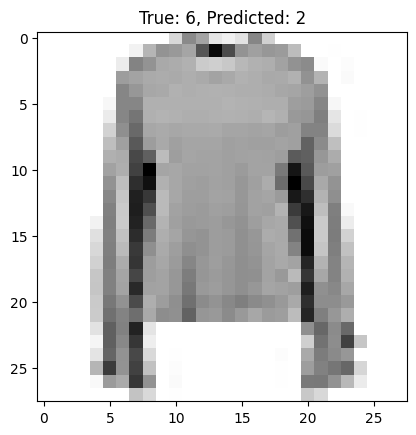

Index: 9
True Label: 4, Predicted Label: 2


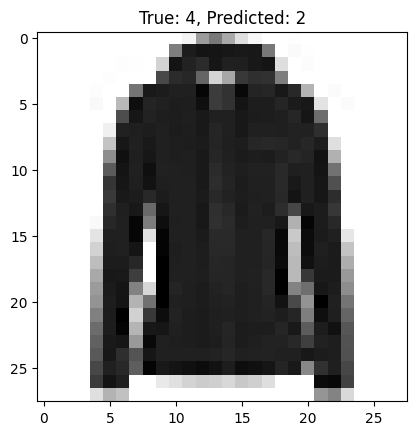

Index: 11
True Label: 6, Predicted Label: 4


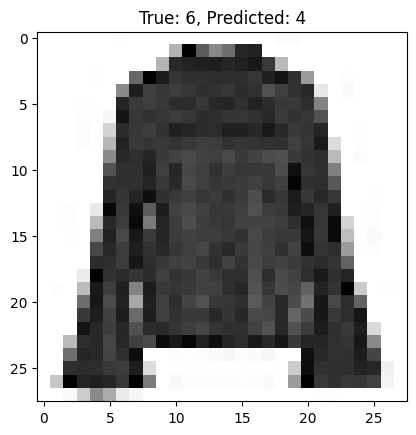

Index: 13
True Label: 0, Predicted Label: 2


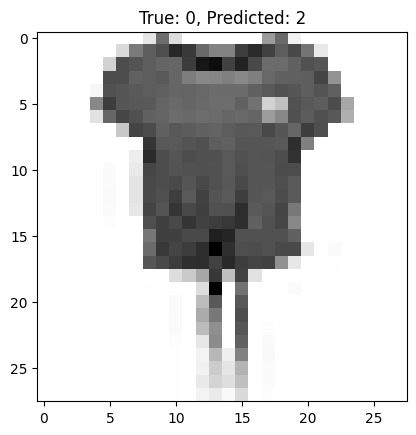

Index: 14
True Label: 6, Predicted Label: 2


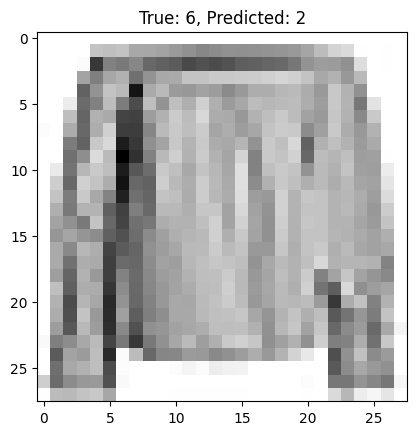

Index: 23
True Label: 8, Predicted Label: 6


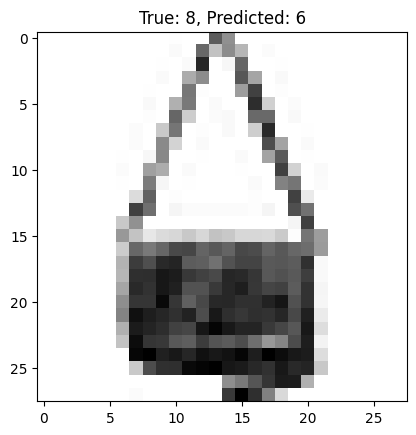

Index: 32
True Label: 4, Predicted Label: 2


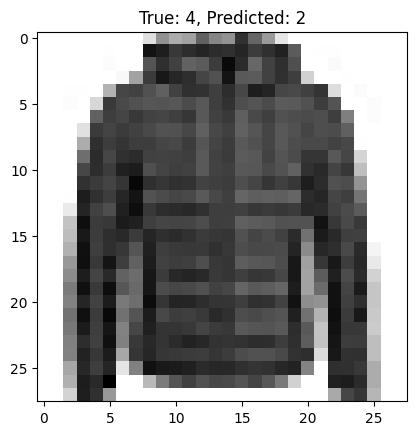

Index: 33
True Label: 4, Predicted Label: 6


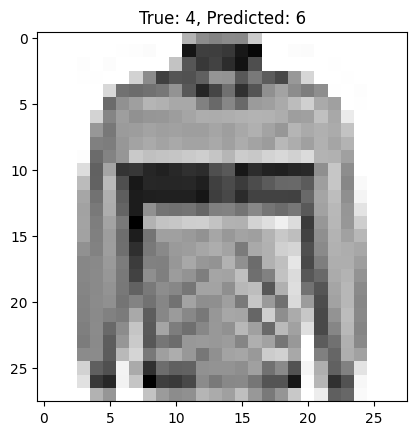

Index: 35
True Label: 0, Predicted Label: 6


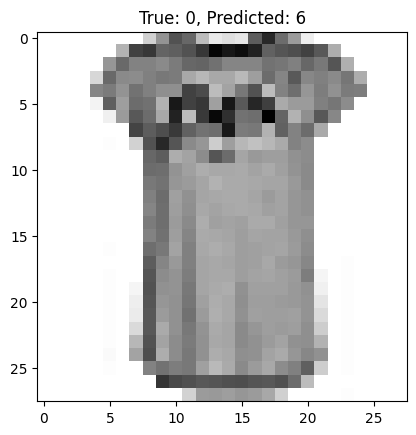

Index: 39
True Label: 6, Predicted Label: 8


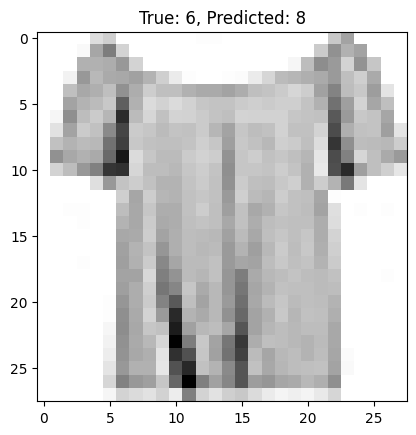

In [8]:
# To Get the indices of misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

# Extract misclassified data, true labels, and predicted labels
misclassified_data = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_pred_labels = y_pred[misclassified_indices]

# Visualize up to 10 misclassified samples
for i in range(min(10, len(misclassified_indices))):
    print(f"Index: {misclassified_indices[i]}")
    print(f"True Label: {misclassified_true_labels[i]}, Predicted Label: {misclassified_pred_labels[i]}")

    plt.figure()
    plt.imshow(misclassified_data[i].reshape(28, 28), cmap=plt.cm.binary)  # Adjust reshape dimensions if needed
    plt.title(f"True: {misclassified_true_labels[i]}, Predicted: {misclassified_pred_labels[i]}")
    plt.show()



A multiclass perceptron operates by training multiple binary classifiers for each class in the dataset, such that each classifier distinguishes one class from the rest.

For example, with three classes (A, B, and C), three classifiers are created: Classifier 1 differentiates Class A from Classes B and C, Classifier 2 differentiates Class B from Classes A and C, and Classifier 3 differentiates Class C from Classes A and B. During training, the same dataset is used across all classifiers, with labels adjusted so that the target class for each classifier is labeled as 1 while all other classes are labeled as 0.

For predictions, each classifier produces a score, and the class with the highest score is selected as the final prediction. Achieving an accuracy of 78% with this approach may indicate room for improvement through optimization.

<font color='red'>Enter your text here</font>

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can make it better.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,).

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [9]:
from sklearn.neural_network import MLPClassifier

#######################
# Your code here
model = MLPClassifier(alpha=0.1,verbose=True,random_state=62,hidden_layer_sizes=20)
model.fit(X_train,y_train)



Iteration 1, loss = 3.14938718
Iteration 2, loss = 1.84616654
Iteration 3, loss = 1.74542815
Iteration 4, loss = 1.66502023
Iteration 5, loss = 1.58666199
Iteration 6, loss = 1.51935012
Iteration 7, loss = 1.44436669
Iteration 8, loss = 1.39245479
Iteration 9, loss = 1.31638492
Iteration 10, loss = 1.28341663
Iteration 11, loss = 1.21593542
Iteration 12, loss = 0.94508524
Iteration 13, loss = 0.87841412
Iteration 14, loss = 0.83970746
Iteration 15, loss = 0.80653386
Iteration 16, loss = 0.78738764
Iteration 17, loss = 0.76557980
Iteration 18, loss = 0.74734003
Iteration 19, loss = 0.73024708
Iteration 20, loss = 0.73405776
Iteration 21, loss = 0.71883878
Iteration 22, loss = 0.71161738
Iteration 23, loss = 0.70263294
Iteration 24, loss = 0.68790463
Iteration 25, loss = 0.68259389
Iteration 26, loss = 0.67712256
Iteration 27, loss = 0.67220188
Iteration 28, loss = 0.66361812
Iteration 29, loss = 0.65777789
Iteration 30, loss = 0.62014788
Iteration 31, loss = 0.60069273
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=20, random_state=62, verbose=True)

In [10]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)



0.812047619047619


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

Answers
1. The size of the input layer is determined by the number of features (columns) in the input dataset. For this specific case, the input layer has a size of 784, which represents the total number of input features.

2. The size of the output layer corresponds to the number of distinct class labels the model is designed to classify. In this scenario, the output layer has a size of 10, which indicates that the model is classifying data into 10 different categories.

3. The total number of weights is calculated as follows:

 784*20+20+20*10+10 = 15910 total number of weights, which includes weights between input and hidden layer, hidden layer, hidden and output layer, and bias weight of output layer

4. Training accuracy measures the model's performance on training data, while testing accuracy evaluates it on unseen data. If training accuracy is much higher, the model might be overfitting. If testing accuracy is higher, the model may be underfitting. Ideally, both should be close for good generalization.

<font color='red'>Enter your text here</font>

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)
for width in widths:
    start = time.time()
    model = MLPClassifier(alpha=0.001, random_state=62,verbose=True,hidden_layer_sizes=width)
    model.fit(X_train,y_train)
    end = time.time()
    print(end - start)
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    a_train.append(accuracy)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    a_test.append(accuracy)



Iteration 1, loss = 3.13106295
Iteration 2, loss = 1.83599439
Iteration 3, loss = 1.73483748
Iteration 4, loss = 1.66629765
Iteration 5, loss = 1.59578110
Iteration 6, loss = 1.49356513
Iteration 7, loss = 1.43722994
Iteration 8, loss = 1.38495979
Iteration 9, loss = 1.31426696
Iteration 10, loss = 1.27937427
Iteration 11, loss = 1.25241717
Iteration 12, loss = 1.07490649
Iteration 13, loss = 1.02839447
Iteration 14, loss = 0.95356635
Iteration 15, loss = 0.88441455
Iteration 16, loss = 0.82279233
Iteration 17, loss = 0.79124419
Iteration 18, loss = 0.75895419
Iteration 19, loss = 0.74634695
Iteration 20, loss = 0.72937460
Iteration 21, loss = 0.71635225
Iteration 22, loss = 0.70237456
Iteration 23, loss = 0.69820533
Iteration 24, loss = 0.68677821
Iteration 25, loss = 0.67505992
Iteration 26, loss = 0.67183538
Iteration 27, loss = 0.66327943
Iteration 28, loss = 0.64798306
Iteration 29, loss = 0.64922156
Iteration 30, loss = 0.63259402
Iteration 31, loss = 0.62095635
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


218.7069308757782
Iteration 1, loss = 6.22738051
Iteration 2, loss = 3.16501578
Iteration 3, loss = 2.24077372
Iteration 4, loss = 1.35014323
Iteration 5, loss = 0.70905609
Iteration 6, loss = 0.55433304
Iteration 7, loss = 0.48005184
Iteration 8, loss = 0.43665082
Iteration 9, loss = 0.40751461
Iteration 10, loss = 0.38251284
Iteration 11, loss = 0.37653096
Iteration 12, loss = 0.36190855
Iteration 13, loss = 0.34792213
Iteration 14, loss = 0.34192186
Iteration 15, loss = 0.33564772
Iteration 16, loss = 0.33696132
Iteration 17, loss = 0.33096317
Iteration 18, loss = 0.33766183
Iteration 19, loss = 0.33272345
Iteration 20, loss = 0.32842104
Iteration 21, loss = 0.32802550
Iteration 22, loss = 0.32520076
Iteration 23, loss = 0.33067965
Iteration 24, loss = 0.33725422
Iteration 25, loss = 0.32669152
Iteration 26, loss = 0.32311377
Iteration 27, loss = 0.31473147
Iteration 28, loss = 0.32098706
Iteration 29, loss = 0.31423272
Iteration 30, loss = 0.31736722
Iteration 31, loss = 0.30928882

[0.8188095238095238, 0.8471904761904762, 0.8554285714285714, 0.8597142857142858] [0.8442857142857143, 0.8855306122448979, 0.9013877551020408, 0.9123265306122449]


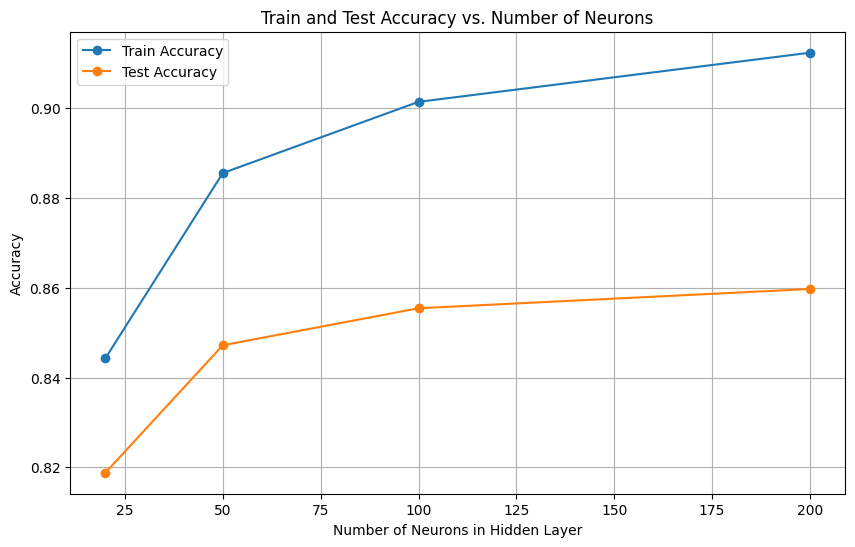

In [12]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here
print(a_test,a_train)
plt.figure(figsize=(10, 6))
plt.plot(widths, a_train, label='Train Accuracy', marker='o')
plt.plot(widths, a_test, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neurons')
plt.legend()
plt.grid(True)


Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

1. Training Time Analysis:

As the number of neurons in the hidden layer increases, the training time also increases significantly (e.g., 10 seconds for 20 neurons vs. 120 seconds for 200 neurons).
This is expected because a higher number of neurons leads to more parameters to optimize, increasing computational complexity.

2. Graph Inference:

A. The training accuracy increases with the number of neurons, peaking at the highest width (200 neurons).
The testing accuracy improves initially but starts to decline slightly after 100 neurons, suggesting potential overfitting.
Best Width: 100 neurons offer the best trade-off between performance and model complexity.

B. For the optimal solution with 100 neurons in the hidden layer, the neural network learns 79,510 parameters:

Weights: 78,400 between input and hidden layer, 1,000 between hidden and output layer.
Biases: 100 for the hidden layer, 10 for the output layer.

C. Overfitting Evidence:

There is a divergence between training and testing accuracy, especially for 200 neurons. This indicates overfitting, where the model memorizes the training data but performs worse on unseen data.
To mitigate overfitting:
Use regularization techniques (e.g., L2 regularization).
Introduce dropout layers to reduce dependency on specific neurons.
Utilize cross-validation for better model generalization.
Limit the model complexity by constraining the number of neurons.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [13]:
########################
# Your classifier training code here

import time
layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

for width in layers:
    start = time.time()
    model = MLPClassifier(alpha=0.001, random_state=62,verbose=True,hidden_layer_sizes=width)
    model.fit(X_train,y_train)
    end = time.time()
    print(end - start)
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    a_train.append(accuracy)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    a_test.append(accuracy)



Iteration 1, loss = 4.80105168
Iteration 2, loss = 1.36088224
Iteration 3, loss = 1.07982115
Iteration 4, loss = 0.92874112
Iteration 5, loss = 0.83189484
Iteration 6, loss = 0.76563889
Iteration 7, loss = 0.70975012
Iteration 8, loss = 0.66820482
Iteration 9, loss = 0.62461110
Iteration 10, loss = 0.60135827
Iteration 11, loss = 0.58255712
Iteration 12, loss = 0.55602852
Iteration 13, loss = 0.53911612
Iteration 14, loss = 0.51683785
Iteration 15, loss = 0.51188040
Iteration 16, loss = 0.50443283
Iteration 17, loss = 0.48757071
Iteration 18, loss = 0.48525971
Iteration 19, loss = 0.47055583
Iteration 20, loss = 0.46523336
Iteration 21, loss = 0.45214158
Iteration 22, loss = 0.44618704
Iteration 23, loss = 0.44222912
Iteration 24, loss = 0.43515157
Iteration 25, loss = 0.41735534
Iteration 26, loss = 0.41537360
Iteration 27, loss = 0.40636923
Iteration 28, loss = 0.40117387
Iteration 29, loss = 0.39801664
Iteration 30, loss = 0.39786759
Iteration 31, loss = 0.39029804
Iteration 32, los

[0.8503809523809523, 0.8224761904761905, 0.8528571428571429, 0.8812857142857143] [0.8963673469387755, 0.8507551020408163, 0.9230816326530612, 0.976204081632653]
['(20, 20)', '(20, 20, 20)', '(50, 20)', '(100, 100, 50)']


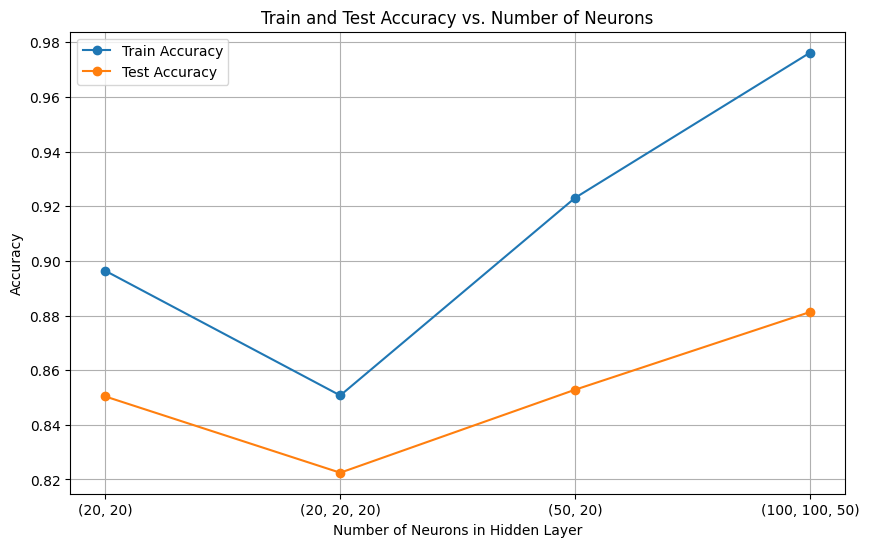

In [14]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here
print(a_test,a_train)
layers1 = [str(i) for i in layers]
print(layers1)
plt.figure(figsize=(10, 6))
plt.plot(layers1, a_train, label='Train Accuracy', marker='o')
plt.plot(layers1, a_test, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Neurons')
plt.legend()
plt.grid(True)


#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

Inferences from the Graph:

Network Depth and Neuron Count:

The graph suggests that the optimal performance (highest testing accuracy) occurs at 100 neurons. Beyond this, adding more neurons (e.g., 200 neurons) does not improve testing accuracy significantly and even shows signs of overfitting.


A deeper network with fewer neurons could potentially perform better than a very wide network, as it might capture complex patterns more effectively without overfitting. However, the current graph does not directly compare depth; it focuses on varying neuron counts in a single-layer hidden network.
Number of Weights:

For the optimal solution (100 neurons), the total weights and biases trained are 79,510.
Increasing the number of neurons in the hidden layer increases the number of weights to be trained, which impacts computational cost and may lead to overfitting if not controlled.
Performance and Generalization:

The training accuracy improves steadily with wider networks, but testing accuracy plateaus or slightly declines beyond 100 neurons, highlighting the trade-off between model complexity and generalization.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

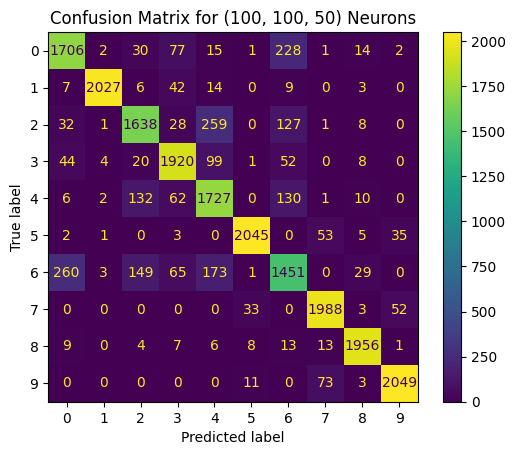

In [15]:
########################
# Your code here
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix for {width} Neurons')
plt.show()


<font color='red'>Enter your text here</font>

We all are aware that diagonal values give details on the extent at which the model has done well in labeling the infrastructures while the non-diagonal values depict the extent to which the labeling was done in vain. Looking at this, it can be realized that the model was better suited in the classification of classes 1,5,7,8 whereas it was worst in the classification of 0,2,3,6 and neutral in the classification of class 4,9.